<h1>Modelo de aprendizaje no supervisado: K - Means</h1>

<h3>Usted es dueño del centro comercial y desea comprender a los clientes como quiénes pueden converger fácilmente [Clientes objetivo] para poder darle esa idea al equipo de marketing y planificar la estrategia en consecuencia.</h3>

<h3>Estudiantes:</h3>
<h4>Cristian Mateo Samboni Muñoz</h4>
<h4>Linda Katerin Rodriguez Moya</h4>
<h4>Deninson Alexander Chamorro Rueda</h4>

<h3>Procedemos a importar las librerias y a declararles variables de llamado</h3>

In [26]:
import pandas as pd # Manejo y analisis de datos
import numpy as np # Calculos numericos y analisis
import seaborn as sns # Grafias estadisticas
import matplotlib.pyplot as plt # Graficas 2D
import plotly.graph_objs as go # Graficas 3D
import plotly.express as px # Graficas 3D

# Función especifica de la libreria para K-Means  
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Función especifica de la libreria para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Función especifica de la libreria para evitar alerta de demaciado uso de memoria
import warnings 
warnings.filterwarnings ("ignore")

<h3>Procedemos a realizar el llamado de la base de datos y a realizar su lectura</h3>

In [28]:
Datos = pd.read_csv("D:/Mall_Customers.csv")

In [30]:
Datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<h3>Ahora miramos una descripción de los datos como la media, los percentiles y los datos minimos y maximos</h3>

In [32]:
# Descripción de los datos 
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h3>Ahora procedemos a buscar datos atipicos</h3>

Text(0.5, 1.0, 'Datos atipicos de los clientes (Puntaje Cliente segun sus gastos)')

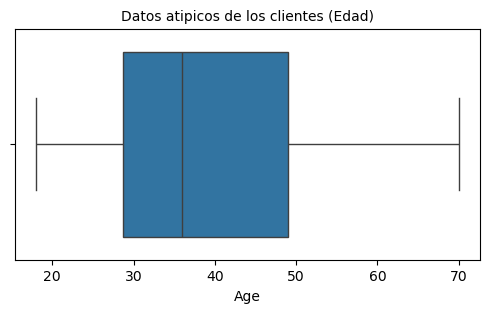

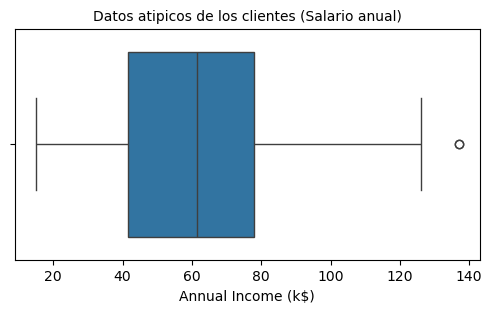

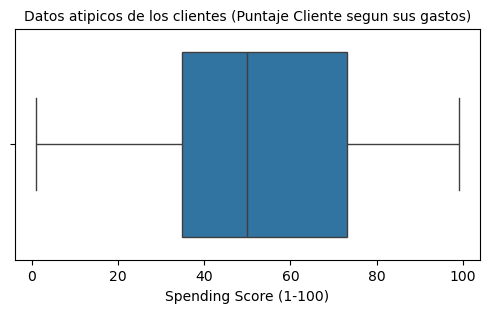

In [50]:
# Identificación de datos atipicos

# Edad
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Datos atipicos de los clientes (Edad)', fontsize=10)

# Salario Anual
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Datos atipicos de los clientes (Salario anual)', fontsize=10)

# Puntaje del cliente segun sus gastos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Datos atipicos de los clientes (Puntaje Cliente segun sus gastos)', fontsize=10)

In [66]:
print("Cantidad de datos con valor cero en edad: ", Datos["Age"].isin([0]).sum())
edad = (Datos["Age"]>100).sum()
print("Cantidad de datos con valores mayores a 100 años", edad)

print("Cantidad de datos con valor cero en Salario Anual", Datos["Annual Income (k$)"].isin([0]).sum())

print("Cantidad de datos con valor cero en Puntaje Cliente segun sus gastos", Datos["Spending Score (1-100)"].isin([0]).sum())

puntaje = (Datos["Spending Score (1-100)"]>101).sum()
print("Cantidad de datos con valores mayores a 100 en puntaje de cliente segun sus gastos", puntaje)

Cantidad de datos con valor cero en edad:  0
Cantidad de datos con valores mayores a 100 años 0
Cantidad de datos con valor cero en Salario Anual 0
Cantidad de datos con valor cero en Puntaje Cliente segun sus gastos 0
Cantidad de datos con valores mayores a 100 en puntaje de cliente segun sus gastos 0


<h3>Ahora procederemos a buscar valores nulos o faltantes</h3>

In [70]:
# Revisamos datos nulos o faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h3>Procederemos a seleccionar las variables que usaremos en el modelo</h3>

In [222]:
# Seleccionamos las columnas de los datos que usaremos 
Datos_usar = Datos[["Annual Income (k$)","Spending Score (1-100)"]]

<h3>Ahora revisamos la nueva base de datos con las variables ya seleccionadas</h3>

In [224]:
# Revisamos la seleccion de columnas 
Datos_usar.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


<h3>Graficamos los datos antes de clasificarlos por grupos</h3>

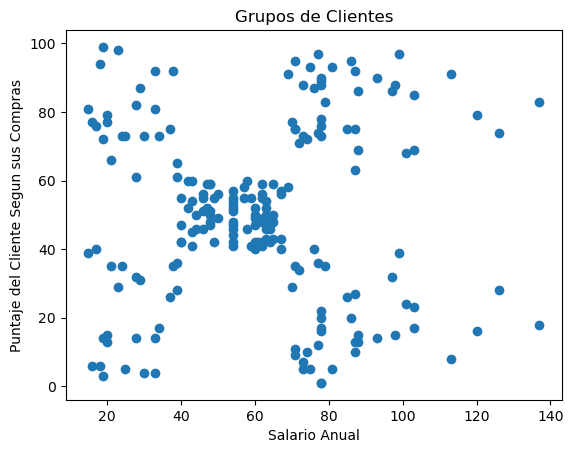

In [226]:
# Graficamos antes de agrupar
plt.scatter(Datos_usar["Annual Income (k$)"], Datos_usar["Spending Score (1-100)"])
plt.xlabel("Salario Anual")
plt.ylabel("Puntaje del Cliente Segun sus Compras")
plt.title("Grupos de Clientes")
plt.show()

<h3>Ahora procederemos a realizar una grafia de codo con el fin de determinar cual es el numero de grupos mas apropiado</h3>

<h5>Para seleccionar el numero de grupos mas apropiado para el grupo, debemos visualizar en el grafico los valores mas cercanos</h5>

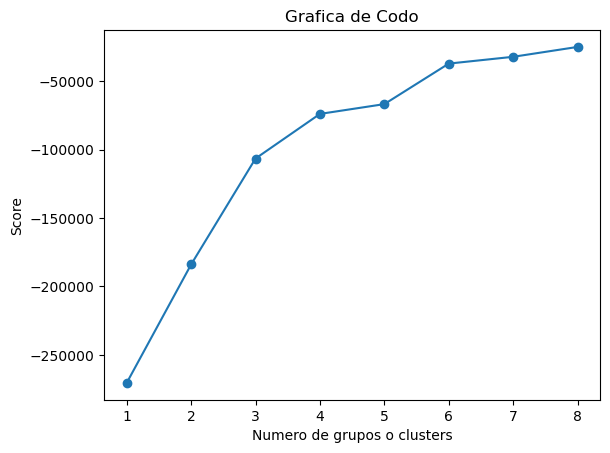

In [287]:
# Se realiza la grafica de codo con el fin de identificar el valor de K 
nc= range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans

score = [kmeans[i].fit(Datos_usar).score(Datos_usar) for i in range(len(kmeans))]
score

plt.plot(nc, score, marker = "o")
plt.xlabel("Numero de grupos o clusters")
plt.ylabel("Score")
plt.title("Grafica de Codo")
plt.show()

<h3>Como se puede observar, el valor con menor espacio entre si es el 5</h3>
<h3>Procederemos a crear la agrupación en el modelo y creamos el modelo</h3>

In [264]:
# Generamos el modelo de agrupacion en grupos de 5 (K=5) 
Modelo = KMeans(n_clusters = 5, random_state = 0)
Modelo.fit(Datos_usar)

KMeans(n_clusters=5, random_state=0)

<h3>Ahora agregamos a la base de datos la columna de "Grupo_agrupamiento" con el fin de evaluar a cual grupo pertenece el dato</h3>

In [266]:
# Agregamos la columna grupo a la base de datos con el fin de identificar el grupo de agrupamiento al que pertenece el dato
Modelo.labels_
Datos_usar["Grupo_agrupamiento"] = Modelo.labels_
print (Datos_usar)

     Annual Income (k$)  Spending Score (1-100)  Grupo_agrupamiento
0                    15                      39                   2
1                    15                      81                   3
2                    16                       6                   2
3                    16                      77                   3
4                    17                      40                   2
..                  ...                     ...                 ...
195                 120                      79                   1
196                 126                      28                   4
197                 126                      74                   1
198                 137                      18                   4
199                 137                      83                   1

[200 rows x 3 columns]


<h3>Graficamos los datos pero ahora agrupados</h3>

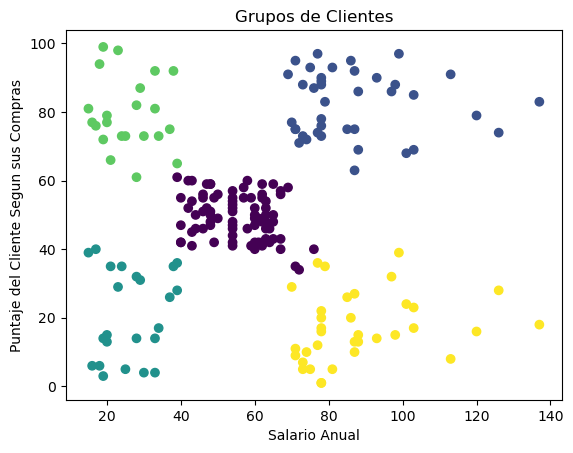

In [268]:
# Graficamos los datos ya clasificados en grupos
plt.scatter(Datos_usar["Annual Income (k$)"], Datos_usar["Spending Score (1-100)"], c = Datos_usar["Grupo_agrupamiento"], cmap = "viridis")
plt.xlabel("Salario Anual")
plt.ylabel("Puntaje del Cliente Segun sus Compras")
plt.title("Grupos de Clientes")
plt.show()

<h2>Evaluación del modelo K - Means</h2>

<h3>Procederemos a evaluar el modelo haciendo uso del coeficiente de silhouette, indice de Calinski Harabasz y el indice de Davies Bouldin</h3>

In [270]:
# Evaluamos le modelo
observaciones = len(Datos_usar)
x = Datos_usar.drop("Grupo_agrupamiento", axis = 1)
clusters = Datos_usar["Grupo_agrupamiento"]

# Coeficiente de silhouette 
sil_score = silhouette_score(x, clusters)
print("Coeficiente de Silhouette", sil_score)

# Indice de Calinski Harabasz
calinski_score = calinski_harabasz_score(x, clusters)
print("Indice de Calinski Harabasz", calinski_score)

# Indice de Davies Bouldin
davies_score = davies_bouldin_score(x, clusters)
print("Indice de Davies Bouldin", davies_score)

Coeficiente de Silhouette 0.553931997444648
Indice de Calinski Harabasz 247.35899338037282
Indice de Davies Bouldin 0.5725628995597086


<h1>Analisis de la evaluación del modelo K - Means</h1>

<h2>Coeficiente de Silhouette</h2> 
<h4>Evalua la cantidad de los clusters, su cercania entre los datos y la separacion de los clusters o grupos.</h4>
<h4>Los valores cercanos o iguales a 1 significa que los datos estan bien agrupados y alejados de otros clusters.</h4>
<h4>Los valores cercanos o iguales a 0 significa que los datos estan en las fronteras entre los grupos o clusters.</h4>
<h4>Valores negativos significa que los datos estan mal agrupados.</h4> 
<h4>En este caso el valor es 0.553931997444648, por tanto, los grupos estan bien formados, pero ahi datos no estan bien separados entre si </h4>


<h2>Indice de Calinski Harabasz</h2>
<h4>Mide la calidad de los grupos y su relacion entre la dispersion de los datos dentro del grupo y el espacio entre los grupos o clusters.</h4>
<h4>Los valores altos indican grupos bien definidos.</h4>
<h4>En este caso el valor es de 247.35899338037282 y sugiere que ahi una buena separacion entre los grupos y agrupacion de los datos dentro de los grupos.</h4>

<h2>Indice de Davies Bouldin</h2>
<h4>Mide la relacion entre la dispersion de los datos dentro de los grupos, este se calcula como promedio.</h4>
<h4>Valores cercanos a cero 0 indica que los grupos estan bien compactos y la frontera de los grupos de datos estan bien separadas.</h4>
<h4>En este caso el valor es de 0.5725628995597086 y sugiere que estan moderadamente separadas las fronteras de los grupos de datos.</h4>